Titanic Machine learning Predications


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV


In [57]:
train_df = pd.read_csv('../train.csv')
test_df = pd.read_csv('../test.csv')

In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [60]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [61]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [62]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [63]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [64]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1




In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family_Size  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [66]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()


,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [67]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_df['Family_size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_size_Grouped'] = train_df['Family_Size'].map(family_map)



In [68]:
train_df.groupby(['Family_size_Grouped'], as_index=False)['Survived'].mean()


,Family_size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [69]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


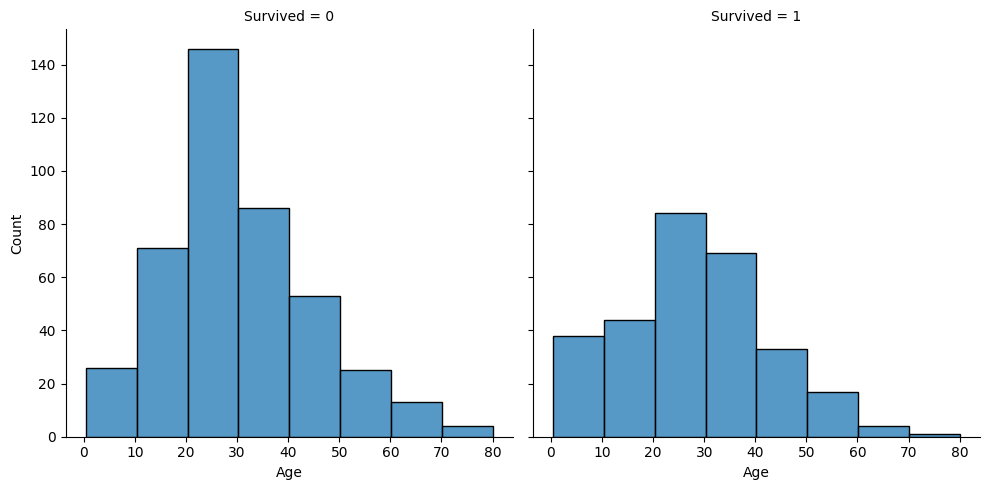

In [70]:
sns.displot(train_df, x= 'Age', col='Survived', binwidth= 10, height=5)

In [71]:

train_df['Age_cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_cut'] = pd.qcut(train_df['Age'], 8)



In [72]:
train_df.groupby(['Age_cut'], as_index=False)['Survived'].mean()


C:\Users\Rishabh sharma\AppData\Local\Temp\ipykernel_5220\627790654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_cut'], as_index=False)['Survived'].mean()


,Age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [77]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47.0), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47.0) & (train_df['Age'] <= 80.0), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age']




test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47.0), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47.0) & (test_df['Age'] <= 80.0), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age']

Series([], Name: Age, dtype: float64)

In [78]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_size_Grouped,Age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,0.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


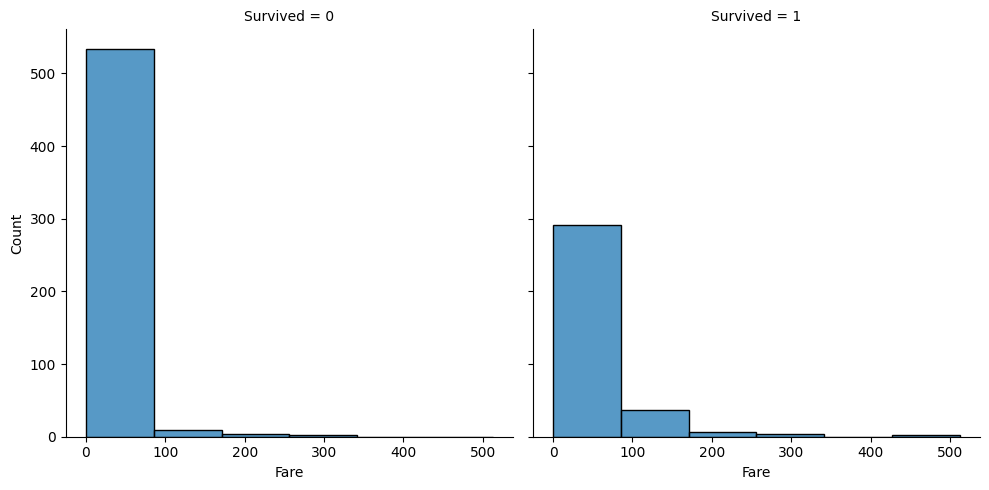

In [80]:
sns.displot(train_df, x='Fare', col='Survived', binwidth= 80, height=5)

In [81]:

train_df['Fare_cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_cut'] = pd.qcut(train_df['Fare'], 6)

In [82]:
train_df.groupby(['Fare_cut'], as_index=False)['Survived'].mean()


C:\Users\Rishabh sharma\AppData\Local\Temp\ipykernel_5220\2022200131.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_cut'], as_index=False)['Survived'].mean()


,Fare_cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [84]:
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 20.125), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 20.125) & (train_df['Fare'] <= 24), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 24) & (train_df['Fare'] <= 28), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 28) & (train_df['Fare'] <= 32.312), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 32.312) & (train_df['Fare'] <= 38), 'Fare'] = 5
train_df.loc[(train_df['Fare'] > 38) & (train_df['Fare'] <= 47.0), 'Fare'] = 6
train_df.loc[(train_df['Fare'] > 47.0) & (train_df['Fare'] <= 80.0), 'Fare'] = 7
train_df.loc[train_df['Fare'] > 80, 'Fare']

test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 20.125), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 20.125) & (test_df['Fare'] <= 24), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 24) & (test_df['Fare'] <= 28), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 28) & (test_df['Fare'] <= 32.312), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 32.312) & (test_df['Fare'] <= 38), 'Fare'] = 5
test_df.loc[(test_df['Fare'] > 38) & (test_df['Fare'] <= 47.0), 'Fare'] = 6
test_df.loc[(test_df['Fare'] > 47.0) & (test_df['Fare'] <= 80.0), 'Fare'] = 7
test_df.loc[test_df['Fare'] > 80, 'Fare']


12      82.2667
24     262.3750
53     263.0000
59     262.3750
64     262.3750
69     263.0000
74     211.5000
75     211.5000
81     221.7792
114    221.7792
141    151.5500
142    262.3750
150     83.1583
156    221.7792
179     83.1583
181     83.1583
184    247.5208
196    134.5000
202    227.5250
217    164.8667
218    211.5000
239    106.4250
242    134.5000
252    136.7792
272    136.7792
287     82.2667
293     81.8583
306    151.5500
308     93.5000
314    135.6333
316    146.5208
324    211.3375
343    512.3292
371    134.5000
374     81.8583
375    262.3750
390     93.5000
400    164.8667
407    211.5000
411     90.0000
414    108.9000
Name: Fare, dtype: float64

In [85]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train